In [78]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

project_id = 'coffee-please-b767a'

from google.cloud import bigquery

# Initialize the BigQuery client
client = bigquery.Client(project=project_id)

In [79]:
# import csv
df = pd.read_csv("level_analysis - Final.csv")
df_filtered = df[(df['level'] <= 50) & (df['level'] >= 5)]

In [80]:
df_filtered.describe()

,level,num_start_user,winrate,drop,arpu,adrw,booster,exit_rate,adrw_per_user,booster_per_user
count,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,27.500000,2704.00000,0.607391,0.044565,0.077924,781.934783,760.021739,0.040697,0.374473,0.393276
std,13.422618,1805.90535,0.212158,0.027785,0.028779,528.592866,549.708468,0.026276,0.306209,0.408068
min,5.000000,990.00000,0.130000,0.000000,0.032633,178.000000,116.000000,0.010441,0.053618,0.065107
25%,16.250000,1353.00000,0.485000,0.020000,0.061692,350.250000,368.000000,0.023417,0.159317,0.155487
50%,27.500000,2080.00000,0.660000,0.040000,0.070401,673.000000,636.000000,0.035192,0.284659,0.230386
75%,38.750000,3315.25000,0.730000,0.060000,0.092610,931.000000,895.250000,0.050479,0.495100,0.458660
max,50.000000,8058.00000,0.940000,0.090000,0.174862,2347.000000,2456.000000,0.132203,1.458188,1.644599


AttributeError: Can only use .str accessor with string values!

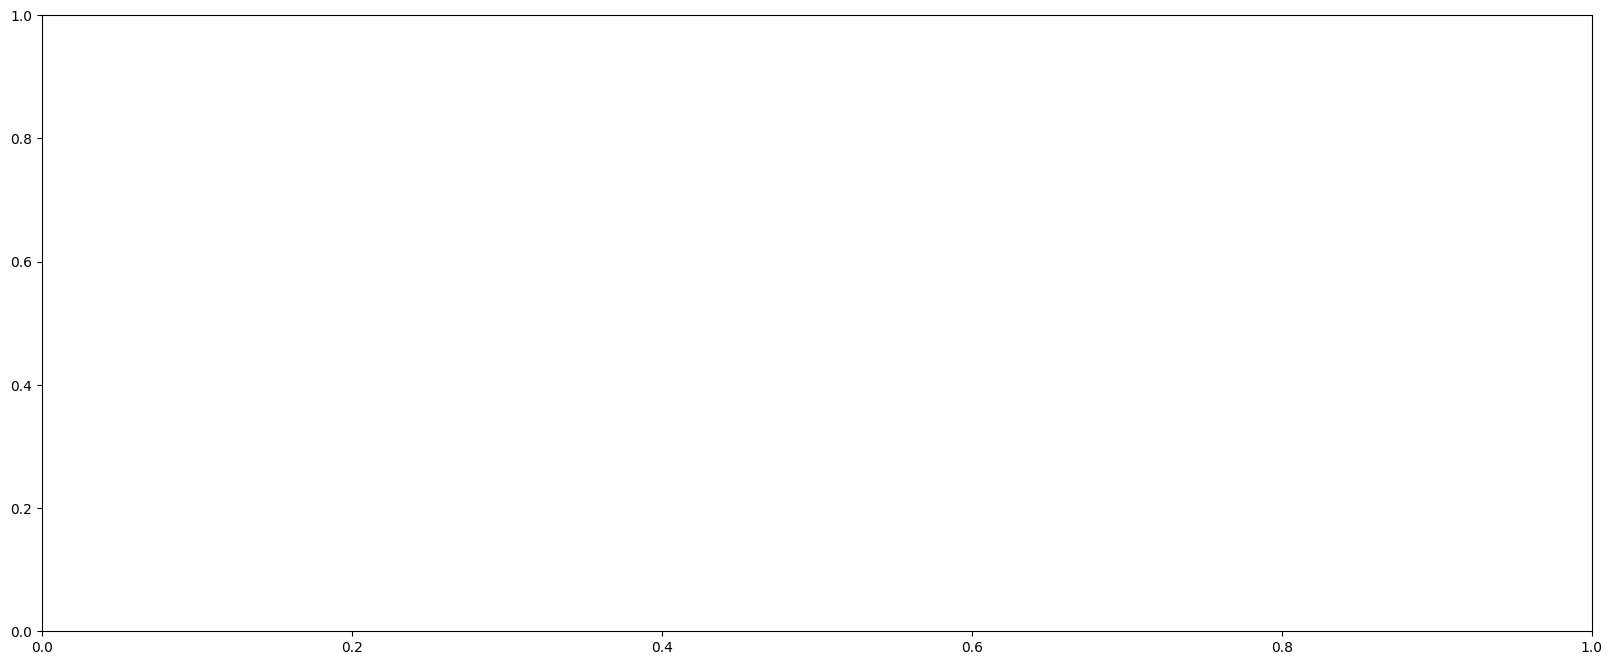

In [81]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot winrate and drop rate on primary y-axis
ax1.plot(df_filtered['level'], df_filtered['winrate'].str.rstrip('%').astype(float), label='Win Rate', marker='o')
ax1.plot(df_filtered['level'], df_filtered['drop'].str.rstrip('%').astype(float), label='Drop Rate', marker='o')

# Set primary y-axis label
ax1.set_xlabel('Level', fontsize=12)
ax1.set_ylabel('Percentage (%)', fontsize=12)

# Create secondary y-axis for ARPU
ax2 = ax1.twinx()
ax2.bar(df_filtered['level'], df_filtered['arpu'], alpha=0.3, label='ARPU', color='gray')
ax2.set_ylabel('ARPU', fontsize=12)

# Customize the plot
plt.title('Win Rate, Drop Rate and ARPU by Level', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=10, loc='upper left')

# Show all x-axis labels
plt.xticks(df_filtered['level'], rotation=45)

# Enable interactive tooltips
from mplcursors import cursor
cursor(hover=True)

# Show the plot
plt.show()

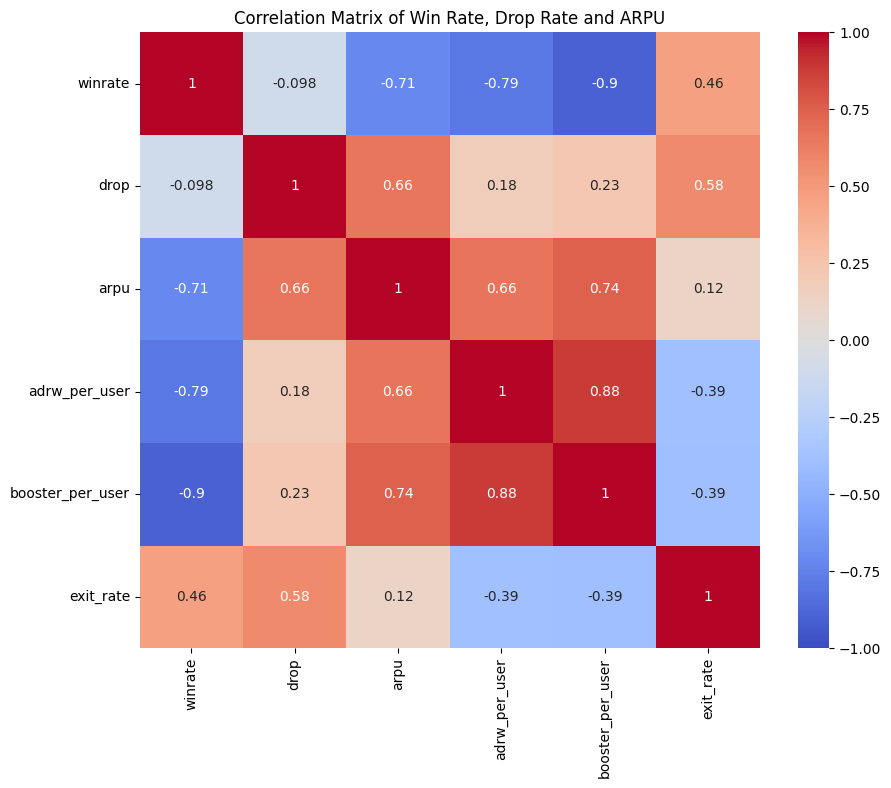

In [52]:
# Calculate correlation matrix
correlation_matrix = df_filtered[['winrate', 'drop', 'arpu','adrw_per_user', 'booster_per_user', 'exit_rate']].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Win Rate, Drop Rate and ARPU')
plt.show()

In [70]:
# Apply min-max scaling to all numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = ['drop', 'arpu', 'adrw_per_user', 'booster_per_user', 'exit_rate']
df_filtered[numeric_columns] = scaler.fit_transform(df_filtered[numeric_columns])

df_filtered.describe()

,level,num_start_user,winrate,drop,arpu,adrw,booster,exit_rate,adrw_per_user,booster_per_user
count,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,27.500000,2704.00000,0.607391,0.495169,0.318437,781.934783,760.021739,0.248489,0.228437,0.207768
std,13.422618,1805.90535,0.212158,0.308727,0.202345,528.592866,549.708468,0.215793,0.218009,0.258354
min,5.000000,990.00000,0.130000,0.000000,0.000000,178.000000,116.000000,0.000000,0.000000,0.000000
25%,16.250000,1353.00000,0.485000,0.222222,0.204312,350.250000,368.000000,0.106571,0.075254,0.057221
50%,27.500000,2080.00000,0.660000,0.444444,0.265544,673.000000,636.000000,0.203271,0.164492,0.104641
75%,38.750000,3315.25000,0.730000,0.666667,0.421696,931.000000,895.250000,0.328824,0.314318,0.249164
max,50.000000,8058.00000,0.940000,1.000000,1.000000,2347.000000,2456.000000,1.000000,1.000000,1.000000


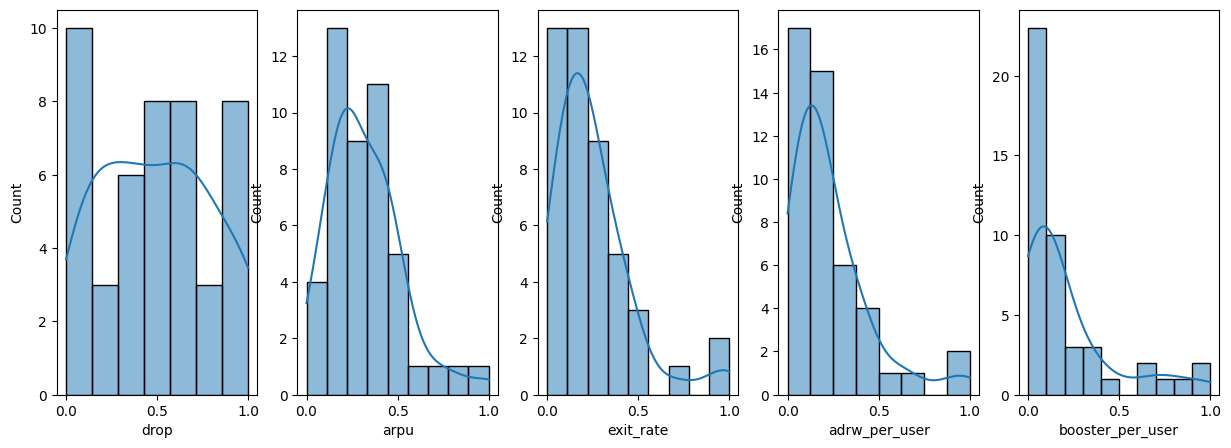

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

# Vẽ phân phối
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(df_filtered['drop'], kde=True, ax=axs[0])
sns.histplot(df_filtered['arpu'], kde=True, ax=axs[1])
sns.histplot(df_filtered['exit_rate'], kde=True, ax=axs[2])
sns.histplot(df_filtered['adrw_per_user'], kde=True, ax=axs[3])
sns.histplot(df_filtered['booster_per_user'], kde=True, ax=axs[4])

# Hiển thị biểu đồ
plt.show()

In [72]:
# Tính toán độ lệch
print(df_filtered['drop'].skew())
print(df_filtered['arpu'].skew())
print(df_filtered['exit_rate'].skew())
print(df_filtered['adrw_per_user'].skew())
print(df_filtered['booster_per_user'].skew())



0.12002027009361244
1.1267589808989957
1.841648387981625
1.8825649461396965
1.8592726809725268


In [73]:
# Hàm dùng cả 4 phương pháp để chuẩn hóa
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_skewness(x, customers):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Vẽ biểu đồ phân phối
    sns.histplot(customers[x], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title(f'Original - {x}')

    sns.histplot(np.log1p(customers[x]), kde=True, ax=ax[0, 1])
    ax[0, 1].set_title(f'Log Transformation - {x}')

    sns.histplot(np.sqrt(customers[x]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title(f'Square Root Transformation - {x}')

    sns.histplot(pd.Series(stats.boxcox(customers[x] + 1)[0]), kde=True, ax=ax[1, 1])
    ax[1, 1].set_title(f'Box-Cox Transformation - {x}')

    plt.tight_layout()
    plt.show()

    # Tính skewness cho từng phương pháp
    original_skew = customers[x].skew().round(2)
    log_skew = np.log1p(customers[x]).skew().round(2)
    sqrt_skew = np.sqrt(customers[x]).skew().round(2)
    boxcox_skew = pd.Series(stats.boxcox(customers[x] + 1)[0]).skew().round(2)

    # In kết quả skewness
    print(f"Skewness (Original): {original_skew}")
    print(f"Skewness (Log Transformation): {log_skew}")
    print(f"Skewness (Square Root Transformation): {sqrt_skew}")
    print(f"Skewness (Box-Cox Transformation): {boxcox_skew}")

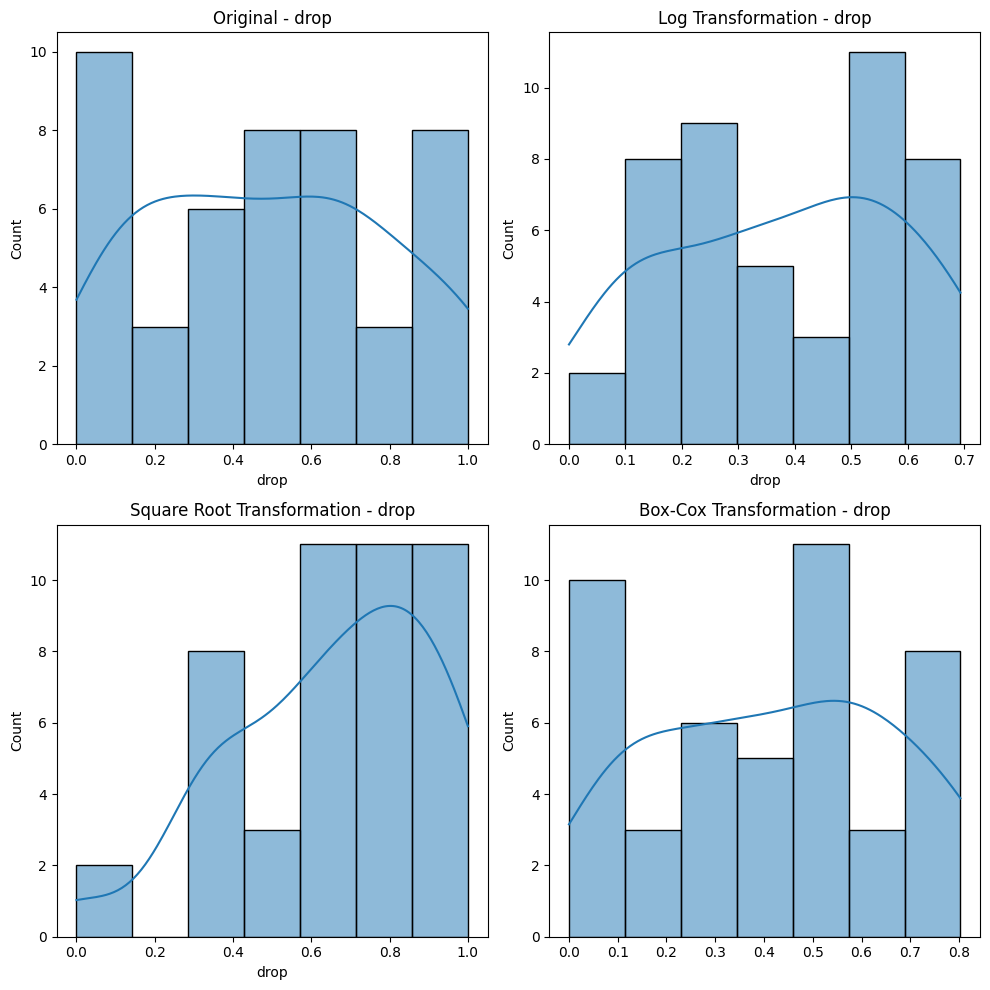

Skewness (Original): 0.12
Skewness (Log Transformation): -0.14
Skewness (Square Root Transformation): -0.66
Skewness (Box-Cox Transformation): -0.03


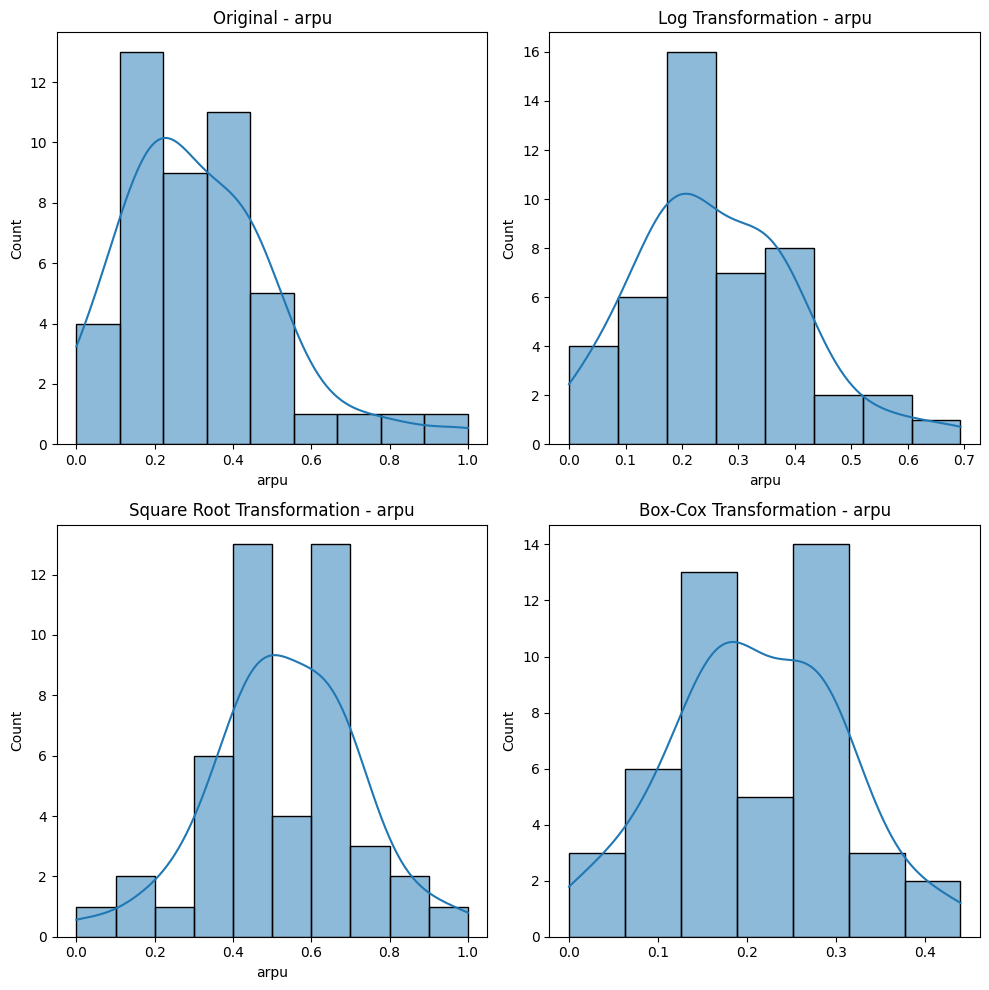

Skewness (Original): 1.13
Skewness (Log Transformation): 0.63
Skewness (Square Root Transformation): -0.2
Skewness (Box-Cox Transformation): 0.02


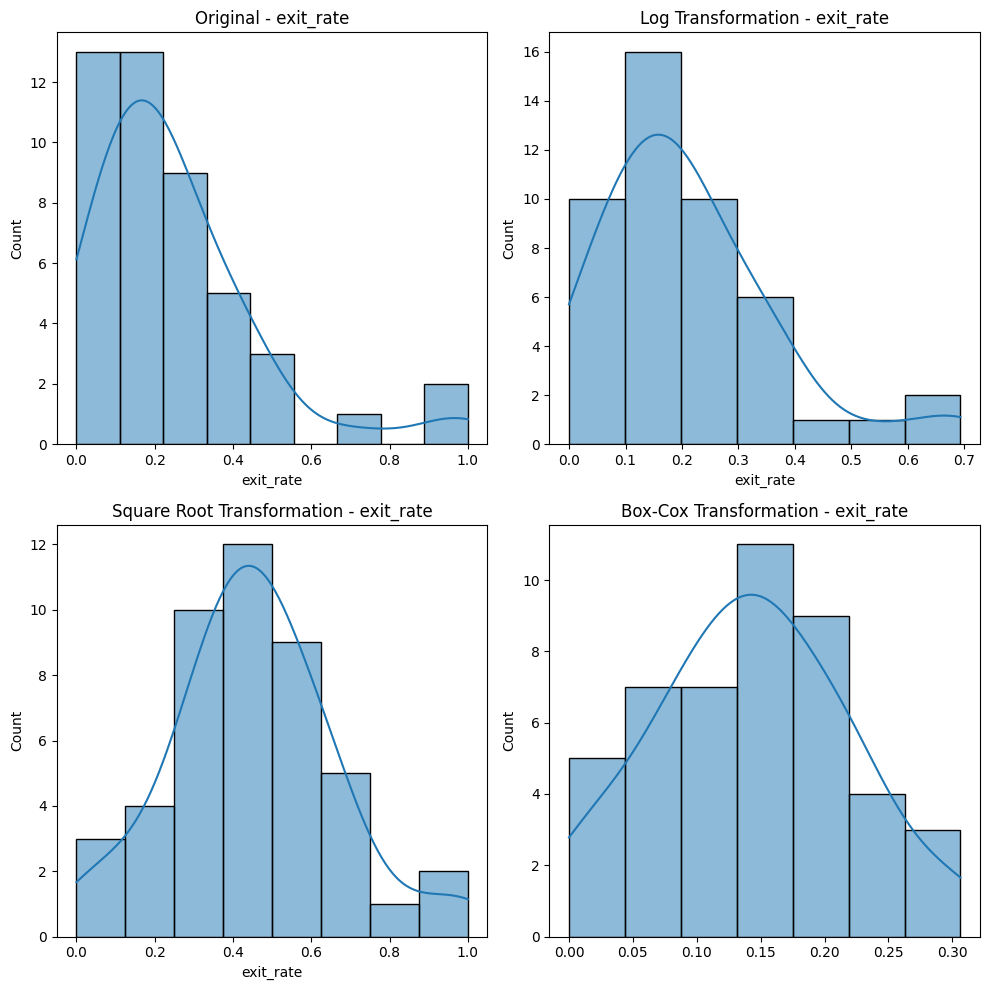

Skewness (Original): 1.84
Skewness (Log Transformation): 1.3
Skewness (Square Root Transformation): 0.32
Skewness (Box-Cox Transformation): 0.08


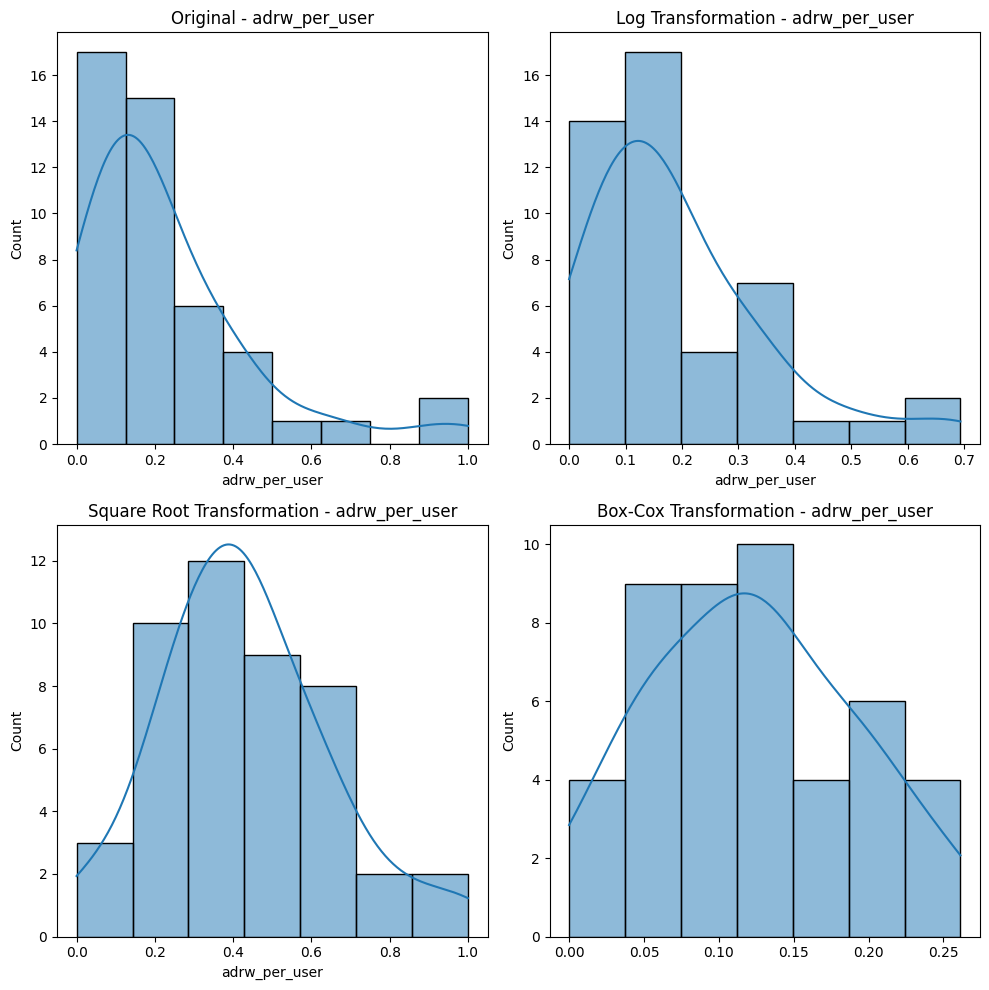

Skewness (Original): 1.88
Skewness (Log Transformation): 1.41
Skewness (Square Root Transformation): 0.55
Skewness (Box-Cox Transformation): 0.17


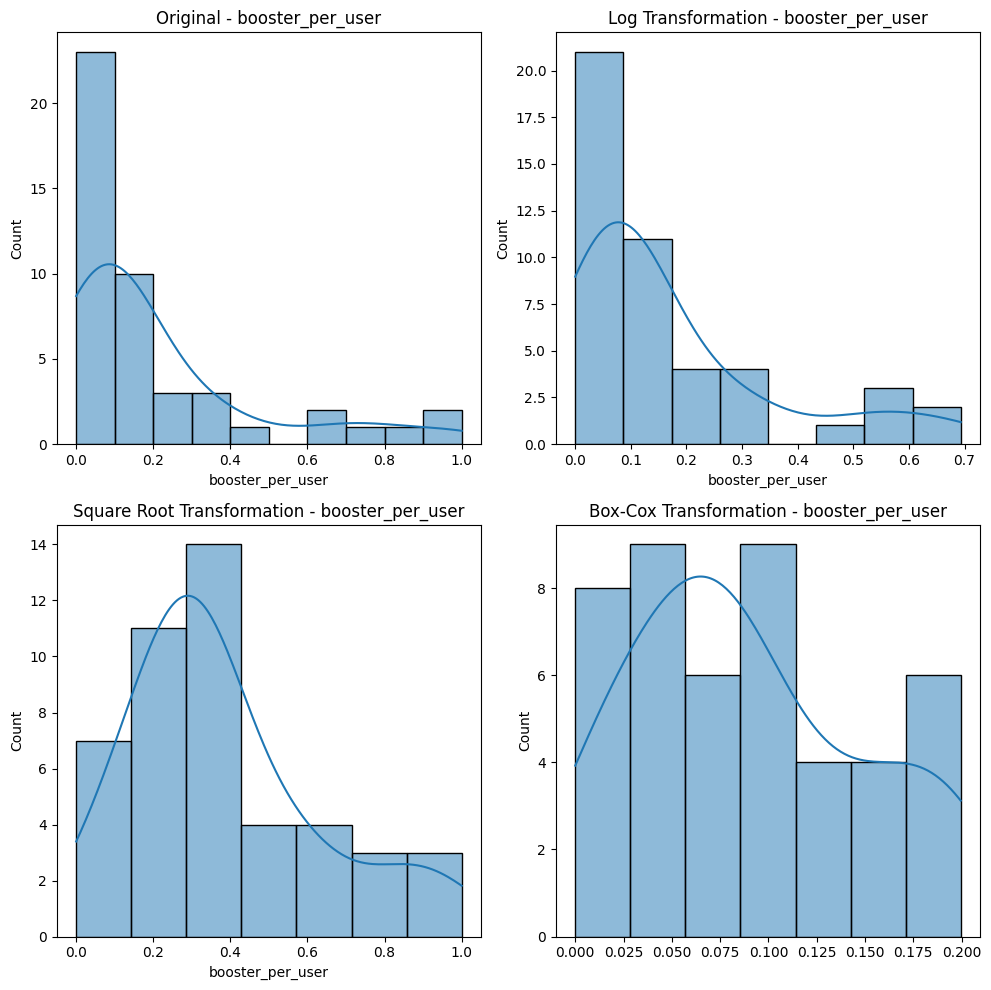

Skewness (Original): 1.86
Skewness (Log Transformation): 1.58
Skewness (Square Root Transformation): 0.99
Skewness (Box-Cox Transformation): 0.43


In [74]:
analyze_skewness('drop', df_filtered)
analyze_skewness('arpu', df_filtered)
analyze_skewness('exit_rate', df_filtered)
analyze_skewness('adrw_per_user', df_filtered)
analyze_skewness('booster_per_user', df_filtered)


In [76]:
df_filtered_t = pd.DataFrame()
from scipy import stats
import numpy as np

# Sử dụng Box-Cox transformation
df_filtered_t['drop'] = stats.boxcox(df_filtered['drop'] + 1)[0]
df_filtered_t['exit_rate'] = stats.boxcox(df_filtered['exit_rate'] + 1)[0]
df_filtered_t['arpu'] = stats.boxcox(df_filtered['arpu'] + 1)[0]
df_filtered_t['adrw_per_user'] = stats.boxcox(df_filtered['adrw_per_user'] + 1)[0]
df_filtered_t['booster_per_user'] = stats.boxcox(df_filtered['booster_per_user'] + 1)[0]


In [77]:
df_filtered_t.head()

,drop,exit_rate,arpu,adrw_per_user,booster_per_user
0,0.802871,0.194520,0.186050,0.108951,0.017253
1,0.802871,0.213506,0.165258,0.000000,0.000000
2,0.727603,0.217262,0.189431,0.063084,0.002968
3,0.649693,0.196731,0.158319,0.001151,0.013325
4,0.649693,0.208928,0.172544,0.156677,0.025499


Winrate không hề tương quan với drop rate -> Tăng độ khó không ảnh hưởng drop 

Winrate không hề tương quan với exit -> Tăng độ khó không ảnh hưởng exit 

Feature Correlations:
                      drop      arpu  exit_rate  adrw_per_user  \
drop              1.000000  0.657608   0.576018       0.175829   
arpu              0.657608  1.000000   0.118338       0.664489   
exit_rate         0.576018  0.118338   1.000000      -0.390179   
adrw_per_user     0.175829  0.664489  -0.390179       1.000000   
booster_per_user  0.228410  0.742962  -0.394518       0.881178   

                  booster_per_user  
drop                      0.228410  
arpu                      0.742962  
exit_rate                -0.394518  
adrw_per_user             0.881178  
booster_per_user          1.000000  

Dropped correlated features: ['booster_per_user']

Selected features after variance threshold: ['adrw_per_user']

Cluster Means:
           drop      arpu  exit_rate  adrw_per_user  booster_per_user
cluster                                                              
0        0.0410  0.079924   0.025598       0.559139          0.573827
1        0.0700  0.

C:\Users\dungv\AppData\Local\Temp\ipykernel_24820\120409370.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = clusters


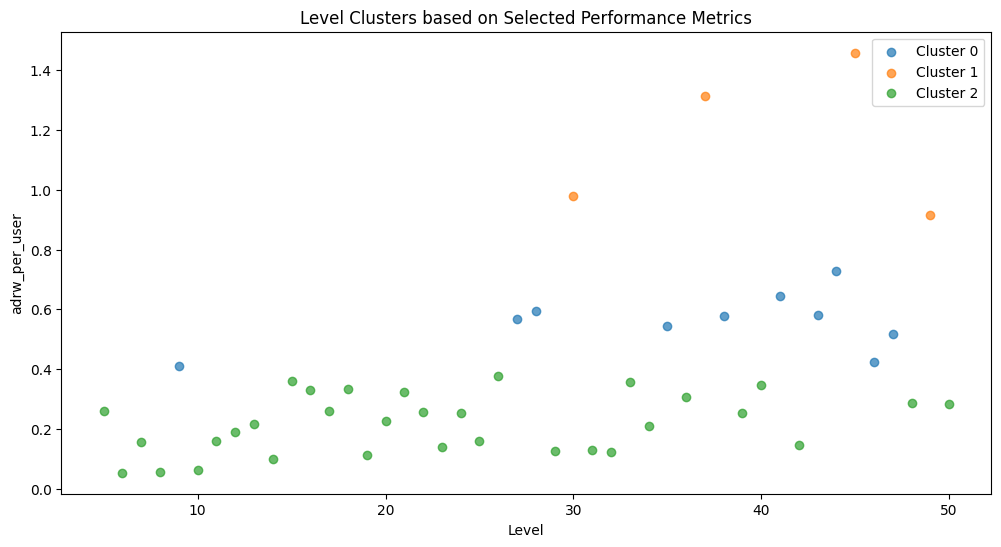


Cluster 0 Levels: [np.int64(9), np.int64(27), np.int64(28), np.int64(35), np.int64(38), np.int64(41), np.int64(43), np.int64(44), np.int64(46), np.int64(47)]

Cluster 1 Levels: [np.int64(30), np.int64(37), np.int64(45), np.int64(49)]

Cluster 2 Levels: [np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(29), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(36), np.int64(39), np.int64(40), np.int64(42), np.int64(48), np.int64(50)]

Cluster Interpretation:
Cluster 0: Bad levels (high drop rate, low ARPU, high exit rate)
Cluster 1: Average levels
Cluster 2: Good levels (low drop rate, high ARPU, low exit rate)


In [60]:
# Import necessary libraries for k-Means clustering and feature selection
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np

# Select the metrics for clustering (excluding winrate)
metrics = ['drop', 'arpu', 'exit_rate', 'adrw_per_user', 'booster_per_user']
X = df_filtered[metrics]

# Check correlation between features
correlation_matrix = X.corr()
print("Feature Correlations:")
print(correlation_matrix)

# Remove highly correlated features (threshold > 0.8)
def remove_correlated_features(X, threshold=0.8):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return X.drop(to_drop, axis=1), to_drop

X_uncorrelated, dropped_features = remove_correlated_features(X)
print("\nDropped correlated features:", dropped_features)

# Remove low variance features
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X_uncorrelated)
selected_features = X_uncorrelated.columns[selector.get_support()].tolist()
print("\nSelected features after variance threshold:", selected_features)

# Normalize the selected features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_selected)

# Apply k-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Add cluster labels to the dataframe
df_filtered['cluster'] = clusters

# Calculate mean values for each cluster
cluster_means = df_filtered.groupby('cluster')[metrics].mean()
print("\nCluster Means:")
print(cluster_means)

# Visualize the clusters using level vs most important feature
plt.figure(figsize=(12, 6))
for i in range(3):
    cluster_data = df_filtered[df_filtered['cluster'] == i]
    plt.scatter(cluster_data['level'], cluster_data[selected_features[0]], 
                label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Level')
plt.ylabel(selected_features[0])
plt.title('Level Clusters based on Selected Performance Metrics')
plt.legend()
plt.show()

# Print the levels in each cluster
for i in range(3):
    cluster_levels = df_filtered[df_filtered['cluster'] == i]['level'].values
    print(f"\nCluster {i} Levels: {sorted(cluster_levels)}")

# Print cluster interpretation
print("\nCluster Interpretation:")
print("Cluster 0: Bad levels (high drop rate, low ARPU, high exit rate)")
print("Cluster 1: Average levels")
print("Cluster 2: Good levels (low drop rate, high ARPU, low exit rate)")

In [61]:
df_filtered.sort_values('level')

,level,num_start_user,winrate,drop,arpu,adrw,booster,exit_rate,adrw_per_user,booster_per_user,cluster
4,5,8058,0.84,0.09,0.066979,2094.0,756.0,0.049888,0.259866,0.093820,2
5,6,7311,0.92,0.09,0.062143,392.0,476.0,0.057174,0.053618,0.065107,2
6,7,6687,0.89,0.08,0.067797,1052.0,467.0,0.058771,0.157320,0.069837,2
7,8,6137,0.94,0.07,0.060599,339.0,534.0,0.050676,0.055239,0.087013,2
8,9,5714,0.83,0.07,0.063801,2347.0,621.0,0.055303,0.410746,0.108680,0
9,10,5310,0.88,0.09,0.095138,330.0,392.0,0.132203,0.062147,0.073823,2
10,11,4848,0.75,0.09,0.094783,781.0,751.0,0.125206,0.161097,0.154909,2
11,12,4419,0.68,0.08,0.092670,840.0,901.0,0.096628,0.190088,0.203892,2
12,13,4073,0.71,0.06,0.088793,882.0,662.0,0.067763,0.216548,0.162534,2
13,14,3824,0.72,0.06,0.092432,382.0,725.0,0.065638,0.099895,0.189592,2


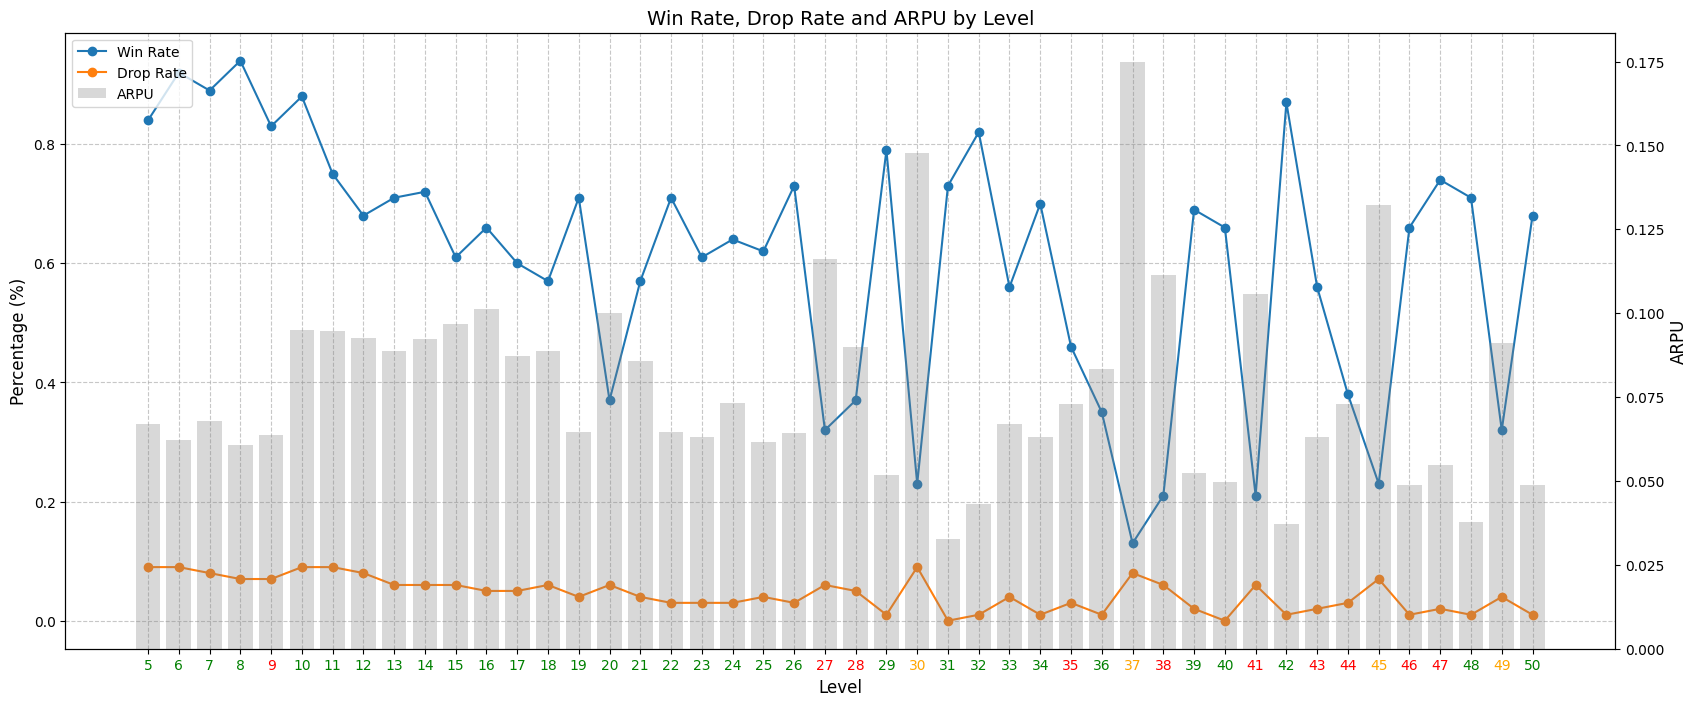

In [62]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot winrate and drop rate on primary y-axis
ax1.plot(df_filtered['level'], df_filtered['winrate'], label='Win Rate', marker='o')
ax1.plot(df_filtered['level'], df_filtered['drop'], label='Drop Rate', marker='o')

# Set primary y-axis label
ax1.set_xlabel('Level', fontsize=12)
ax1.set_ylabel('Percentage (%)', fontsize=12)

# Create secondary y-axis for ARPU
ax2 = ax1.twinx()
ax2.bar(df_filtered['level'], df_filtered['arpu'], alpha=0.3, label='ARPU', color='gray')
ax2.set_ylabel('ARPU', fontsize=12)

# Customize the plot
plt.title('Win Rate, Drop Rate and ARPU by Level', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=10, loc='upper left')

# Show all x-axis labels with colors based on clusters
xticks = plt.xticks(df_filtered['level'], rotation=45)
for i, tick in enumerate(ax1.xaxis.get_ticklabels()):
    level = df_filtered['level'].iloc[i]
    cluster = df_filtered[df_filtered['level'] == level]['cluster'].iloc[0]
    if cluster == 0:
        tick.set_color('red')
    elif cluster == 1:
        tick.set_color('orange') 
    else:
        tick.set_color('green')

# Enable interactive tooltips
from mplcursors import cursor
cursor(hover=True)

# Show the plot
plt.show()

# Bỏ 20 level đầu 

In [56]:
df_filtered2 = df[(df['level'] <= 50) & (df['level'] >= 21)]

Cluster Means:
             drop      arpu  exit_rate  adrw_per_user  booster_per_user
cluster                                                                
0        0.012308  0.052876   0.022533       0.333867          0.278050
1        0.063750  0.121128   0.021475       0.881561          1.144521
2        0.031111  0.067112   0.038679       0.282298          0.249906


C:\Users\dungv\AppData\Local\Temp\ipykernel_24820\611203697.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['cluster'] = clusters


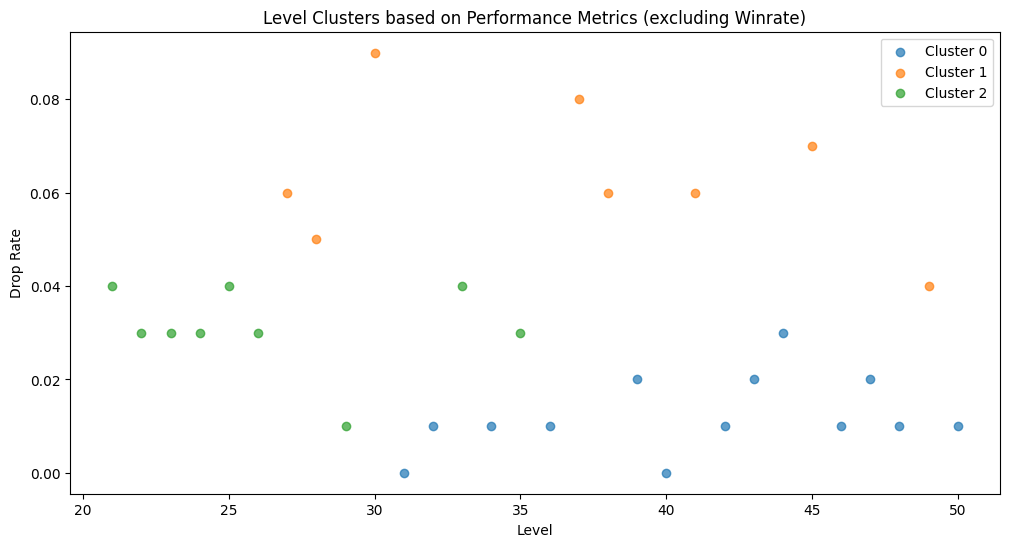


Cluster 0 Levels: [np.int64(31), np.int64(32), np.int64(34), np.int64(36), np.int64(39), np.int64(40), np.int64(42), np.int64(43), np.int64(44), np.int64(46), np.int64(47), np.int64(48), np.int64(50)]

Cluster 1 Levels: [np.int64(27), np.int64(28), np.int64(30), np.int64(37), np.int64(38), np.int64(41), np.int64(45), np.int64(49)]

Cluster 2 Levels: [np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(29), np.int64(33), np.int64(35)]

Cluster Interpretation:
Cluster 0: Bad levels (high drop rate, low ARPU, high exit rate)
Cluster 1: Average levels
Cluster 2: Good levels (low drop rate, high ARPU, low exit rate)


In [57]:
# Import necessary libraries for k-Means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Select the metrics for clustering (excluding winrate)
metrics = ['drop', 'arpu', 'exit_rate', 'adrw_per_user', 'booster_per_user']
X = df_filtered2[metrics]

# Normalize the data to 0-1 scale
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply k-Means clustering with 3 clusters (bad, average, good)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Add cluster labels to the dataframe
df_filtered2['cluster'] = clusters

# Calculate mean values for each cluster to interpret them
cluster_means = df_filtered2.groupby('cluster')[metrics].mean()

# Print cluster means to interpret the clusters
print("Cluster Means:")
print(cluster_means)

# Visualize the clusters using level vs drop rate (as an example)
plt.figure(figsize=(12, 6))
for i in range(3):
    cluster_data = df_filtered2[df_filtered2['cluster'] == i]
    plt.scatter(cluster_data['level'], cluster_data['drop'], 
                label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Level')
plt.ylabel('Drop Rate')
plt.title('Level Clusters based on Performance Metrics (excluding Winrate)')
plt.legend()
plt.show()

# Print the levels in each cluster
for i in range(3):
    cluster_levels = df_filtered2[df_filtered2['cluster'] == i]['level'].values
    print(f"\nCluster {i} Levels: {sorted(cluster_levels)}")

# Print cluster interpretation based on metrics
print("\nCluster Interpretation:")
print("Cluster 0: Bad levels (high drop rate, low ARPU, high exit rate)")
print("Cluster 1: Average levels")
print("Cluster 2: Good levels (low drop rate, high ARPU, low exit rate)")

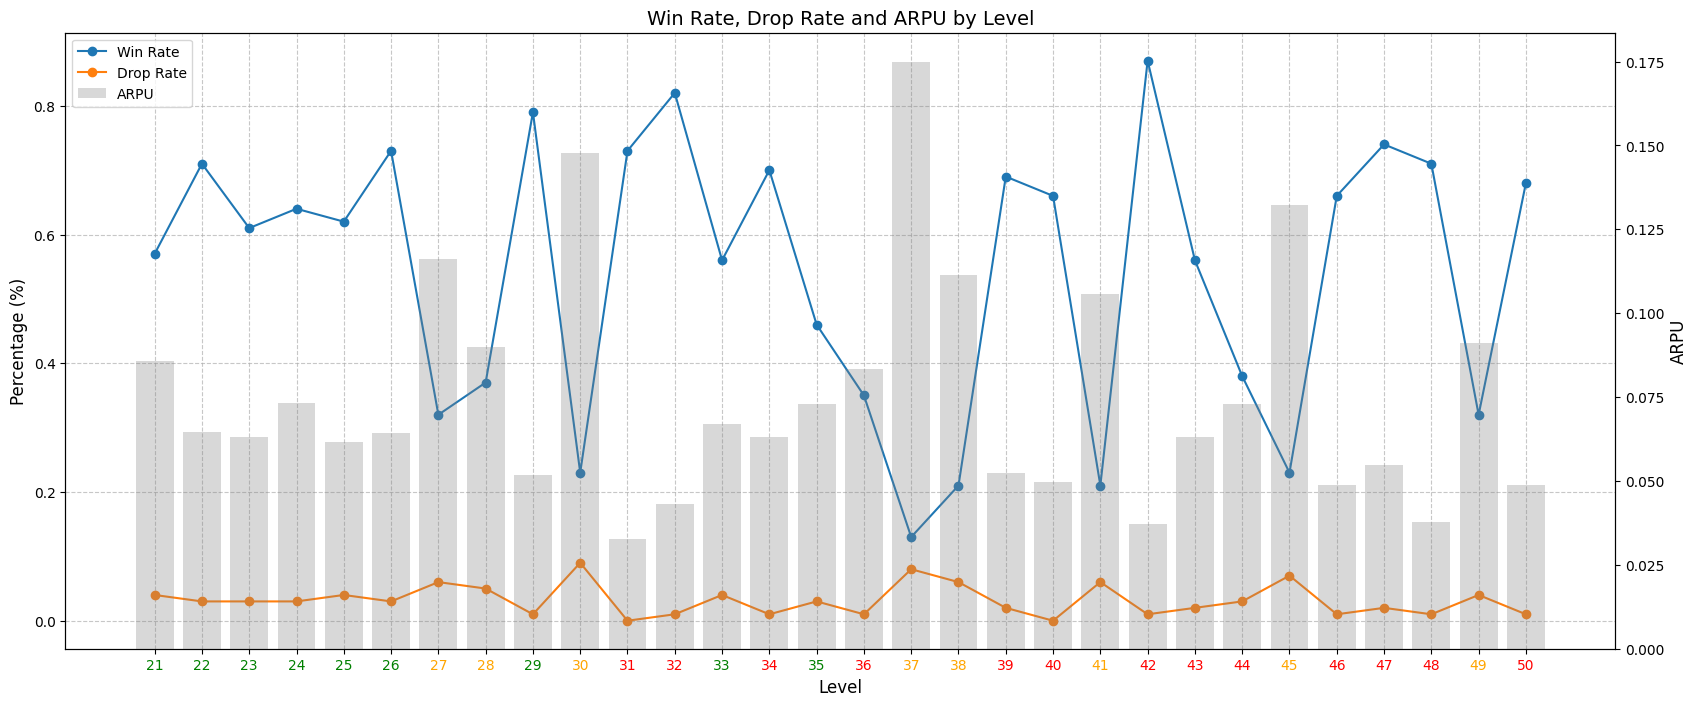

In [59]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot winrate and drop rate on primary y-axis
ax1.plot(df_filtered2['level'], df_filtered2['winrate'], label='Win Rate', marker='o')
ax1.plot(df_filtered2['level'], df_filtered2['drop'], label='Drop Rate', marker='o')

# Set primary y-axis label
ax1.set_xlabel('Level', fontsize=12)
ax1.set_ylabel('Percentage (%)', fontsize=12)

# Create secondary y-axis for ARPU
ax2 = ax1.twinx()
ax2.bar(df_filtered2['level'], df_filtered2['arpu'], alpha=0.3, label='ARPU', color='gray')
ax2.set_ylabel('ARPU', fontsize=12)

# Customize the plot
plt.title('Win Rate, Drop Rate and ARPU by Level', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=10, loc='upper left')

# Show all x-axis labels with colors based on clusters
xticks = plt.xticks(df_filtered2['level'], rotation=45)
for i, tick in enumerate(ax1.xaxis.get_ticklabels()):
    level = df_filtered2['level'].iloc[i]
    cluster = df_filtered2[df_filtered2['level'] == level]['cluster'].iloc[0]
    if cluster == 0:
        tick.set_color('red')
    elif cluster == 1:
        tick.set_color('orange') 
    else:
        tick.set_color('green')

# Enable interactive tooltips
from mplcursors import cursor
cursor(hover=True)

# Show the plot
plt.show()